<a href="https://colab.research.google.com/github/Asim927/Task-13/blob/main/Task_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
digits = load_digits()

X = digits.data   # already flattened images
y = digits.target

print(X.shape)



(1797, 64)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


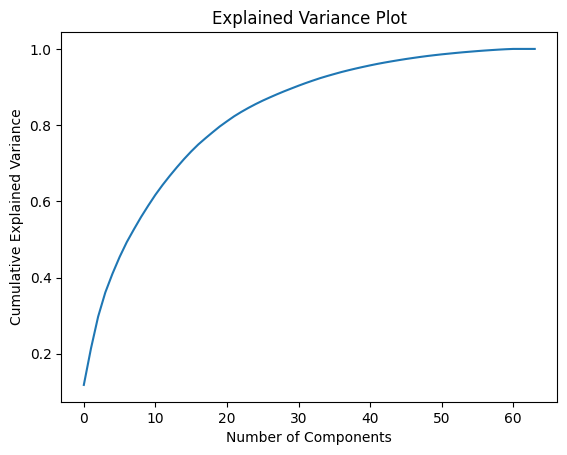

In [ ]:
pca = PCA()
pca.fit(X_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Plot")
plt.show()


In [ ]:
pca = PCA(n_components=30)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train, y_train)

pred_original = model_original.predict(X_test)

acc_original = accuracy_score(y_test, pred_original)
print("Original Accuracy:", acc_original)


Original Accuracy: 0.9722222222222222


In [ ]:
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)

pred_pca = model_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, pred_pca)
print("PCA Accuracy:", acc_pca)


PCA Accuracy: 0.9638888888888889


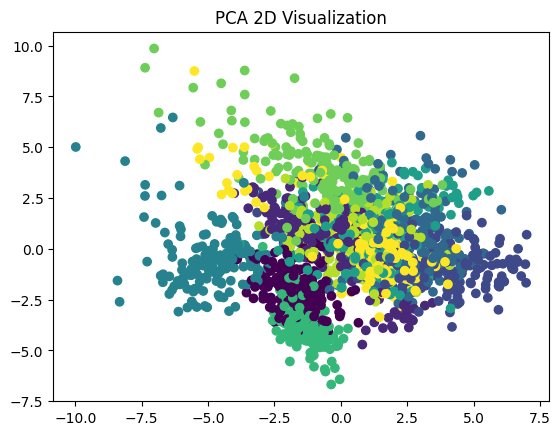

In [ ]:
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)

plt.scatter(X_2d[:,0], X_2d[:,1], c=y)
plt.title("PCA 2D Visualization")
plt.show()


In [ ]:
X_reduced = pd.DataFrame(X_train_pca)
X_reduced['label'] = y_train

X_reduced.to_csv("digits_reduced_dataset.csv", index=False)
